In [1]:
import autoencoder.adversarial_cluster as aaec
import autoencoder.adversarial as aae
from matplotlib import pyplot as plt
%matplotlib inline

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
esize = [(64,3), (128, 3), (256,3)]
dsize = list(reversed(esize))

params =dict()

params['nclusters'] = 20
params['width'] = 32
params['height'] = 32
params['nchannels'] = 3
params['channels'] = [0,1,2]
params['nepochs'] = 20
params['batchsize'] = 256
params['learning_rate'] = 0.001
params['restore'] = False
params['latent_size'] = 256
params['enc_sizes'] = esize 
params['dec_sizes'] = dsize
params['droprate'] = 0.85
params['stdev'] = 0.04
params['denoise'] = False
params['slam'] = 0

datadir = "/media/cjw/Data/cyto/mmCompensatedTifs/"


Using data from: /media/cjw/Data/cyto/mmCompensatedTifs/
Saving checkpoints to: /media/cjw/Data/cyto/Checkpoints/2018-08-28-16-36-29_idec_try_2/checkpoint-2018-08-28-16-36-29/autoencoder-256x
Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32) (?, 32, 32, 3)
isize:  4 32
dh0 (?, 32, 32, 3)
[<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>, <tf.Variable 'encoder/filter_00/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'encoder/filter_02/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>, <tf.Variable 'encoder/filter_02/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/kernel:0' shape=(4096, 256) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'decoder/dense/kernel:0' shape=(256, 4096) dt

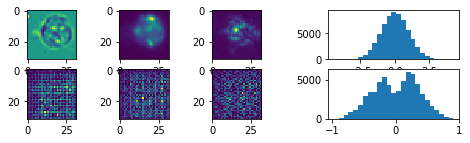

10 1.1674017 0.98234355 50.68617
20 1.2296895 0.85810965 18.479961
display


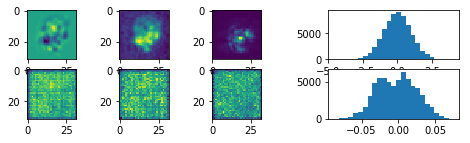

30 1.1198528 0.8294327 15.906849
40 1.0527472 1.0625181 13.092266
display


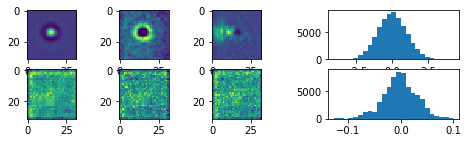

50 1.2435453 0.680799 15.659321
60 1.1711099 0.84166646 21.423729
display


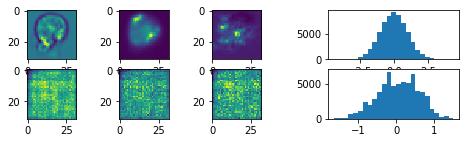

70 4.2150307 0.85364187 29.099957
80 1.2221174 1.9122727 30.54208
display


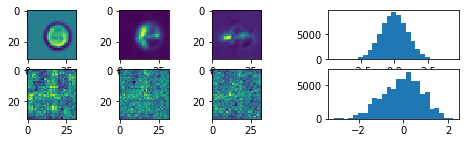

90 11.64207 2.6341362 22.766743
100 3.401553 0.53883946 19.54155
display


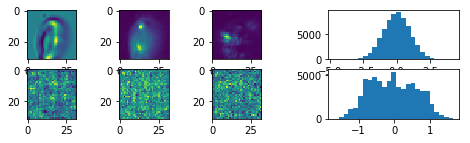

110 2.8546493 0.5490625 15.674305
120 1.35988 1.2211323 18.678291
display


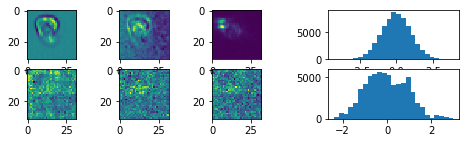

130 2.1993597 0.5030644 16.35187
140 2.2152097 0.51361644 14.321034
display


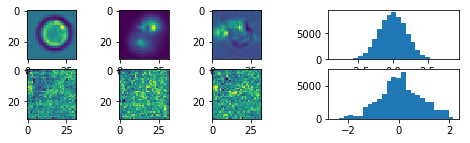

150 2.1844134 0.57543397 10.393076
160 1.5060203 0.59976757 8.963602
display


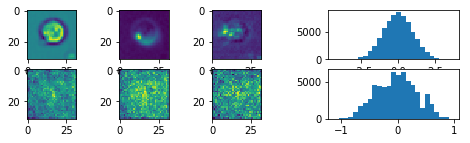

170 1.405509 0.6162204 9.920133
180 2.0092652 0.92021835 12.134083
display


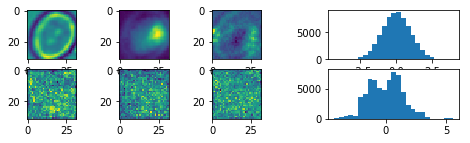

190 2.7640848 0.53337693 9.920078
200 1.4942217 1.0071833 10.735446
display


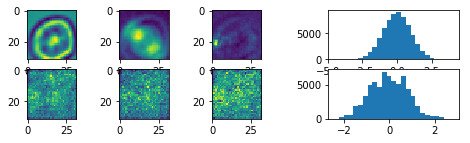

Done


In [3]:
t = aae.training(params, datadir, "idec_try_2")
t.train(gpu=False, display=True, display_int=20, report_int=10, niterations=201)

#aae.train(1001, display=True, display_int=500, report_int=50,title="Adver_try3")

In [4]:
import autoencoder.cluster_layer as cl

In [5]:
nc = t.params['nclusters']
m = t.params['latent_size']

from import sklearn.cluster import KMeans
c = cl.cluster_layer()
c.build()

TypeError: build() missing 1 required positional argument: 'input_shape'

In [13]:
len(t.df)

180000